In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pylab as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
df = pd.read_csv('df.csv')
temp = pd.read_csv('temp.csv')

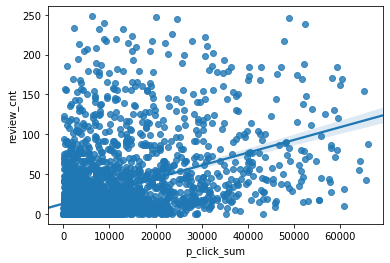

In [14]:
sns.regplot(x = 'p_click_sum', y = 'review_cnt', data = temp)

In [16]:
scaler = MinMaxScaler().fit(temp[['pay_point', 'p_cnt', 'avg_price', 'category_cnt', 'follower_cnt', 'avg_upload_term', 'shop_click', 'avg_prod_click', 'p_click_sum', 'zzim', 'comment_cnt', 'review_cnt']])

In [18]:
scaler.transform(temp[['pay_point', 'p_cnt', 'avg_price', 'category_cnt', 'follower_cnt', 'avg_upload_term', 'shop_click', 'avg_prod_click', 'p_click_sum', 'zzim', 'comment_cnt', 'review_cnt']])

array([[0.02023409, 0.03685504, 0.1379295 , ..., 0.10750507, 0.96138996,
        0.08467742],
       [0.09337865, 0.06879607, 0.04139111, ..., 0.3336714 , 0.14671815,
        0.01209677],
       [0.01144847, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00348787, 0.02702703, 0.38046378, ..., 0.01318458, 0.02316602,
        0.        ],
       [0.02632667, 0.01228501, 0.        , ..., 0.0020284 , 0.05791506,
        0.        ],
       [0.00328664, 0.2039312 , 0.24386588, ..., 0.03448276, 0.        ,
        0.        ]])

In [20]:
features = ['pay_point', 'p_cnt', 'avg_price', 'category_cnt', 'follower_cnt', 'avg_upload_term', 'shop_click', 'avg_prod_click', 'p_click_sum', 'zzim', 'comment_cnt', 'review_cnt']
scaler_df = pd.DataFrame(scaler.transform(temp[features]))
scaler_df.columns = features
scaler_df

,pay_point,p_cnt,avg_price,category_cnt,follower_cnt,avg_upload_term,shop_click,avg_prod_click,p_click_sum,zzim,comment_cnt,review_cnt
0,0.020234,0.036855,0.137930,0.254902,0.180239,0.335139,0.098733,0.061433,0.076221,0.107505,0.961390,0.084677
1,0.093379,0.068796,0.041391,0.117647,0.015201,0.102335,0.137317,0.928328,0.118780,0.333671,0.146718,0.012097
2,0.011448,0.000000,0.000000,0.000000,0.010858,0.000000,0.002418,0.054608,0.005547,0.000000,0.000000,0.000000
3,0.003130,0.004914,0.289738,0.039216,0.061346,0.085308,0.011121,0.020478,0.004032,0.003043,0.482625,0.048387
4,0.019843,0.965602,0.392701,0.058824,0.123779,0.026840,0.343777,0.051195,0.187363,0.278905,0.633205,0.197581
...,...,...,...,...,...,...,...,...,...,...,...,...
3091,0.621606,0.341523,0.129067,0.411765,0.013572,0.003207,0.000000,0.116041,0.070780,0.402637,0.050193,0.012097
3092,0.001487,0.002457,0.000000,0.019608,0.000000,0.000000,0.000000,0.784983,0.003395,0.003043,0.000000,0.000000
3093,0.003488,0.027027,0.380464,0.039216,0.002172,0.044550,0.000000,0.068259,0.003365,0.013185,0.023166,0.000000
3094,0.026327,0.012285,0.000000,0.039216,0.000000,0.041469,0.000000,0.201365,0.003501,0.002028,0.057915,0.000000


In [24]:
scaler_df = scaler_df.astype(float)
scaler_df['sum'] = scaler_df['p_cnt']+scaler_df['avg_price']+scaler_df['category_cnt']+scaler_df['follower_cnt']+scaler_df['avg_upload_term']+scaler_df['shop_click']+scaler_df['avg_prod_click']+scaler_df['p_click_sum']+scaler_df['zzim']+scaler_df['comment_cnt']+scaler_df['review_cnt']

scaler_df['real_point'] = temp['pay_point']
scaler_df['top2_sum'] = scaler_df['shop_click'] + scaler_df['p_click_sum']

In [53]:
scaler_df['t1'] = scaler_df['zzim'] + scaler_df['review_cnt']

In [58]:
scaler_df['group'] = temp['point_group']

In [54]:
scaler_df

,pay_point,p_cnt,avg_price,category_cnt,follower_cnt,avg_upload_term,shop_click,avg_prod_click,p_click_sum,zzim,comment_cnt,review_cnt,sum,real_point,top2_sum,t1
0,0.020234,0.036855,0.137930,0.254902,0.180239,0.335139,0.098733,0.061433,0.076221,0.107505,0.961390,0.084677,2.335024,36200.0,0.174954,0.192182
1,0.093379,0.068796,0.041391,0.117647,0.015201,0.102335,0.137317,0.928328,0.118780,0.333671,0.146718,0.012097,2.022281,167060.0,0.256098,0.345768
2,0.011448,0.000000,0.000000,0.000000,0.010858,0.000000,0.002418,0.054608,0.005547,0.000000,0.000000,0.000000,0.073430,20482.0,0.007965,0.000000
3,0.003130,0.004914,0.289738,0.039216,0.061346,0.085308,0.011121,0.020478,0.004032,0.003043,0.482625,0.048387,1.050207,5600.0,0.015152,0.051430
4,0.019843,0.965602,0.392701,0.058824,0.123779,0.026840,0.343777,0.051195,0.187363,0.278905,0.633205,0.197581,3.259769,35500.0,0.531140,0.476485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,0.621606,0.341523,0.129067,0.411765,0.013572,0.003207,0.000000,0.116041,0.070780,0.402637,0.050193,0.012097,1.550883,1112090.0,0.070780,0.414734
3092,0.001487,0.002457,0.000000,0.019608,0.000000,0.000000,0.000000,0.784983,0.003395,0.003043,0.000000,0.000000,0.813485,2660.0,0.003395,0.003043
3093,0.003488,0.027027,0.380464,0.039216,0.002172,0.044550,0.000000,0.068259,0.003365,0.013185,0.023166,0.000000,0.601403,6240.0,0.003365,0.013185
3094,0.026327,0.012285,0.000000,0.039216,0.000000,0.041469,0.000000,0.201365,0.003501,0.002028,0.057915,0.000000,0.357780,47100.0,0.003501,0.002028


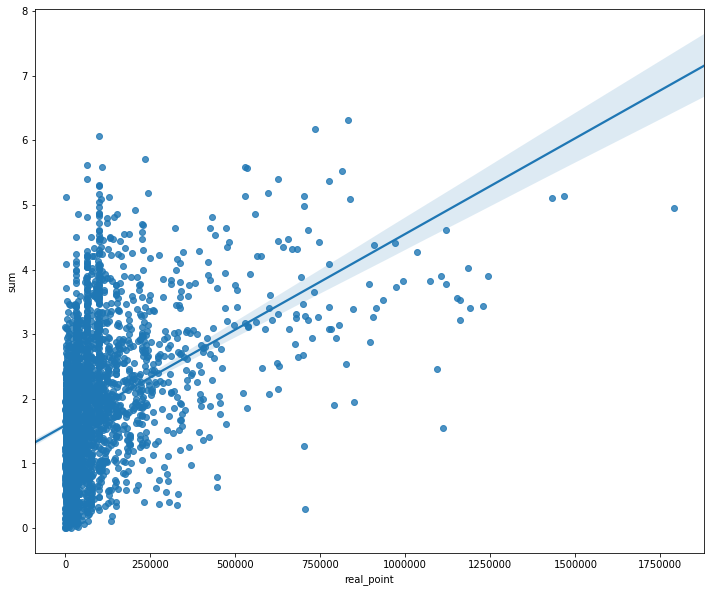

In [34]:
plt.figure(figsize=(12, 10))
sns.regplot(x='sum', y = 'sum', data = scaler_df)

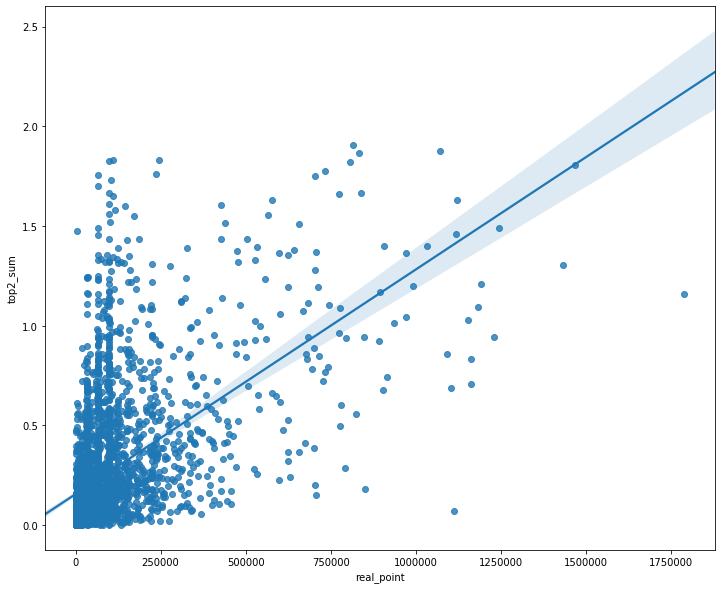

In [35]:
plt.figure(figsize=(12, 10))
sns.regplot(x='real_point', y = 'top2_sum', data = scaler_df)

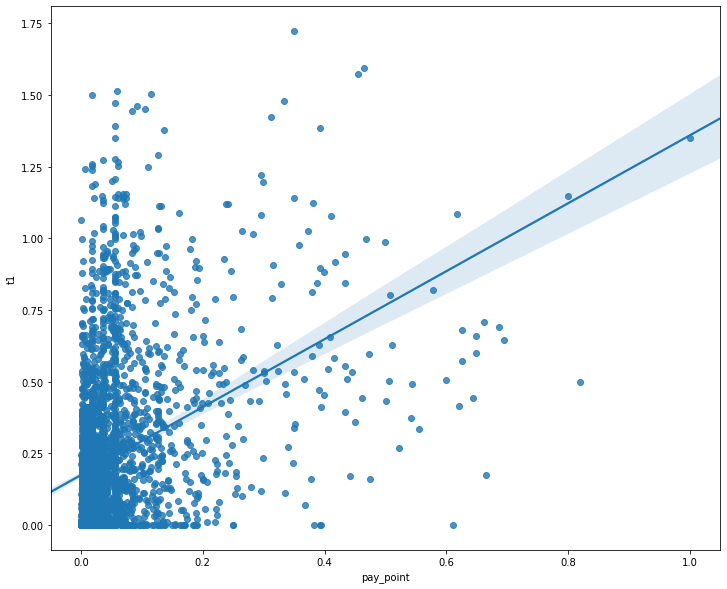

In [57]:
plt.figure(figsize=(12, 10))
sns.regplot(x='pay_point', y = 't1', data = scaler_df)

Text(26.42645833333333, 0.5, 'zzim + review count')

<Figure size 864x720 with 0 Axes>

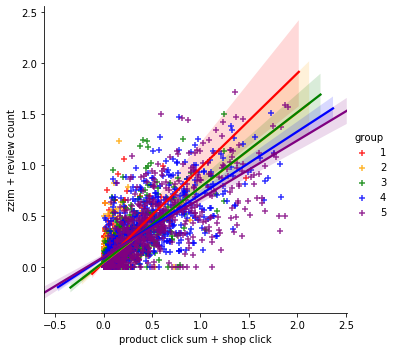

In [112]:
plt.figure(figsize=(12,10))
sns.lmplot(x="top2_sum", y="t1", hue="group", palette = ['red', 'orange', 'green', 'blue', 'purple'], markers='+', data=scaler_df)
plt.xlabel('product click sum + shop click')
plt.ylabel('zzim + review count')

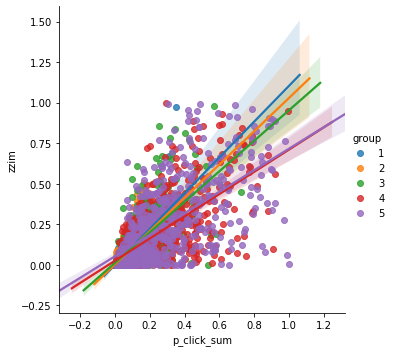

In [108]:
sns.lmplot(x='p_click_sum', y='zzim', hue='group',data=scaler_df)
# sns.lmplot(x='p_click_sum', y='review_cnt', hue='group',data=scaler_df)


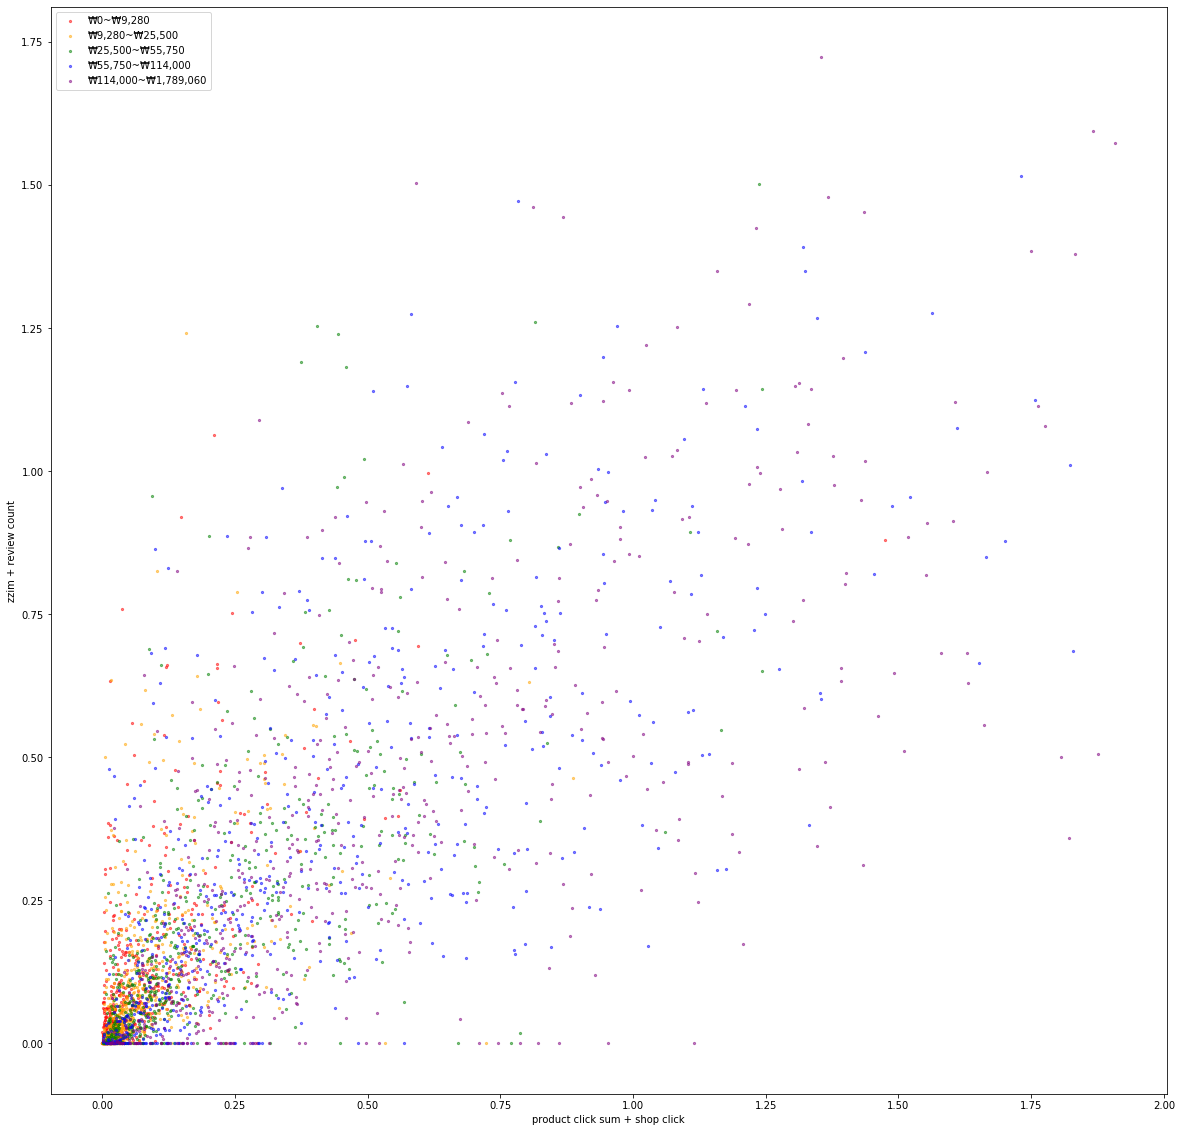

In [95]:
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(111)

ax1.scatter(x = 'top2_sum', y = 't1', data = scaler_df[scaler_df['group'] == 1], c='red', alpha=0.5, s=5, label='₩0~₩9,280')
ax1.scatter(x = 'top2_sum', y = 't1', data = scaler_df[scaler_df['group'] == 2], c='orange', alpha=0.5, s=5, label='₩9,280~₩25,500')
ax1.scatter(x = 'top2_sum', y = 't1', data = scaler_df[scaler_df['group'] == 3], c='green', alpha=0.5, s=5, label='₩25,500~₩55,750')
ax1.scatter(x = 'top2_sum', y = 't1', data = scaler_df[scaler_df['group'] == 4], c='blue', alpha=0.5, s=5, label='₩55,750~₩114,000')
ax1.scatter(x = 'top2_sum', y = 't1', data = scaler_df[scaler_df['group'] == 5], c='purple', alpha=0.5, s=5, label='₩114,000~₩1,789,060')

plt.legend(loc='upper left')
plt.xlabel('product click sum + shop click')
plt.ylabel('zzim + review count')

plt.show()
# plt.savefig('shop_pc.png')

Text(0, 0.5, 'product click sum')

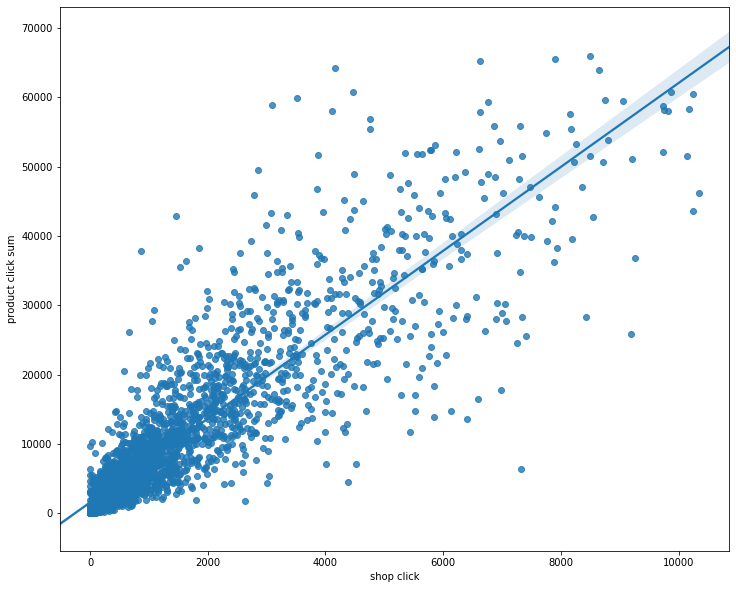

In [85]:
fig = plt.figure(figsize=(12,10))
sns.regplot(x='shop_click', y = 'p_click_sum', data=temp)
plt.xlabel('shop click')
plt.ylabel('product click sum')

In [113]:
item_click_df = pd.DataFrame(columns=df.columns)


In [114]:
item_click_df

,Unnamed: 0,uid,pay_sum,pay_point,pay_free,p_cnt,avg_price,category_cnt,follower_cnt,avg_upload_term,shop_click,avg_prod_click,p_click_sum,zzim,comment_cnt,normal_review_cnt,cert_review_cnt,review_cnt


In [116]:
item_click_df.append(df.iloc[2])

,Unnamed: 0,uid,pay_sum,pay_point,pay_free,p_cnt,avg_price,category_cnt,follower_cnt,avg_upload_term,shop_click,avg_prod_click,p_click_sum,zzim,comment_cnt,normal_review_cnt,cert_review_cnt,review_cnt
2,5.0,7379.0,419862.0,419862.0,0.0,127.0,29508.7244,35.0,323.0,14.624,4012.0,37.0,24792.0,256.0,397.0,11.0,32.0,43.0


In [117]:
df.iloc[2]

Unnamed: 0                5.0000
uid                    7379.0000
pay_sum              419862.0000
pay_point            419862.0000
pay_free                  0.0000
p_cnt                   127.0000
avg_price             29508.7244
category_cnt             35.0000
follower_cnt            323.0000
avg_upload_term          14.6240
shop_click             4012.0000
avg_prod_click           37.0000
p_click_sum           24792.0000
zzim                    256.0000
comment_cnt             397.0000
normal_review_cnt        11.0000
cert_review_cnt          32.0000
review_cnt               43.0000
Name: 2, dtype: float64